In [19]:
!pip install spacy
!python -m spacy download de_core_news_lg
!pip install pandas as pd
!pip install wordcloud matplotlib
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.8/567.8 MB 3.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [20]:
import spacy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

In [3]:
nlp = spacy.load("de_core_news_lg")

In [26]:
text = "Ich will gerne mehr über NLP erfahren, weil es ein superspannendes Feld ist."

doc = nlp(text)

# **Tokenisierung**

In [5]:
for w in doc:
  print(w.text)

Ich
will
gerne
mehr
über
NLP
erfahren
,
weil
es
ein
superspannendes
Feld
ist
.


# **Lemmatisierung**

In [6]:
for w in doc:
  print(w.text,': ',w.lemma_)

Ich :  ich
will :  wollen
gerne :  gerne
mehr :  mehr
über :  über
NLP :  NLP
erfahren :  erfahren
, :  --
weil :  weil
es :  es
ein :  ein
superspannendes :  superspannend
Feld :  Feld
ist :  sein
. :  --


# **Part-of-Speech Tagging**

In [7]:
for w in doc:
  print(w.text,': ',w.pos_,': ',spacy.explain(w.pos_))

Ich :  PRON :  pronoun
will :  AUX :  auxiliary
gerne :  ADV :  adverb
mehr :  PRON :  pronoun
über :  ADP :  adposition
NLP :  PROPN :  proper noun
erfahren :  VERB :  verb
, :  PUNCT :  punctuation
weil :  SCONJ :  subordinating conjunction
es :  PRON :  pronoun
ein :  DET :  determiner
superspannendes :  ADJ :  adjective
Feld :  NOUN :  noun
ist :  AUX :  auxiliary
. :  PUNCT :  punctuation


In [8]:

sentence_analyzed = []
for w in doc:
  sentence_analyzed.append({"Token": w.text, "Lemma": w.lemma_, "Part of Speech": w.pos_})
pd.DataFrame(sentence_analyzed)

,Token,Lemma,Part of Speech
0,Ich,ich,PRON
1,will,wollen,AUX
2,gerne,gerne,ADV
3,mehr,mehr,PRON
4,über,über,ADP
5,NLP,NLP,PROPN
6,erfahren,erfahren,VERB
7,",",--,PUNCT
8,weil,weil,SCONJ
9,es,es,PRON


In [9]:
# Display dependency tree in Jupyter or web browser
spacy.displacy.render(doc, style="dep", jupyter=True, options={"compact": True, "bg": "#fafafa"})

In [23]:
sample_story = """Ein märchenhaftes Abenteuer in fünf Kapiteln


Es war einmal ein kleiner Junge namens Emil, der mit seinen Eltern in einem abgeschiedenen Dorf namens Tannengrund lebte. Das Dorf war umgeben von weiten Wiesen und dichten Wäldern – besonders auffällig war der Flüsterwald, der sich wie ein grüner Ozean bis zum Horizont erstreckte. Niemand wagte sich tief hinein. Alte Geschichten erzählten von wandernden Bäumen, sprechenden Tieren und vergessenen Pfaden, die sich bewegten wie Lebewesen.

Emils Großvater, ein ehemaliger Förster, war der Einzige, der je in das Innere vorgedrungen war. Abends erzählte er Emil Geschichten vom „Herz des Waldes“, einem geheimen Ort, an dem Zeit und Raum keine Rolle spielten. Emil hörte gebannt zu, mit großen Augen und voller Sehnsucht, selbst eines Tages das Herz des Waldes zu finden.


Eines Morgens, als der Nebel wie ein silbernes Band über den Feldern lag, sah Emil am Waldrand ein Reh. Doch dieses Reh war anders: Es hatte ein weißes Fell und Augen, die wie kleine Monde leuchteten. Es wirkte verletzt – sein Vorderlauf zitterte. Ohne nachzudenken, rannte Emil los, um zu helfen.

Das Reh verschwand tiefer in den Wald, doch Emil folgte – über Moos, unter tief hängenden Ästen hindurch, vorbei an flüsternden Farnen und rauschenden Bächen. Erst als er durch ein dichtes Geäst trat und auf eine kleine Lichtung kam, wurde ihm bewusst: Er war allein.

Das Reh war verschwunden. Der Weg zurück? Nicht mehr zu erkennen.

Er drehte sich mehrmals im Kreis, rief nach seinen Eltern, doch nur das Echo antwortete. Der Flüsterwald hatte ihn aufgenommen.


Nach Stunden des Wanderns und Tränen der Verzweiflung, begegnete Emil einer Gestalt aus Moos und Holz – dem Waldhüter, einem uralten Wesen mit Augen so alt wie die Eichen selbst.

„Du bist ein Suchender“, sprach der Waldhüter mit einer Stimme, die wie Wind in den Blättern klang. „Doch wer den Weg hinaus sucht, muss erst den Weg nach innen finden.“

Der Waldhüter erklärte Emil, dass er drei Prüfungen bestehen müsse:

1. Die Prüfung des Mutes
Ein dunkler Tunnel führte unter eine alte Eiche. Dort wohnte die Angstspinnerin, eine riesige Spinne aus Nebel, die Emil seine schlimmsten Ängste zeigte: Verlassenwerden, Dunkelheit, Einsamkeit. Doch Emil schloss die Augen und sagte: „Ich habe keine Angst vor dem, was ich verstehe.“ Die Spinne verschwand.

2. Die Prüfung des Herzens
Ein verletzter Wolf blockierte den Pfad. Emil hatte Angst, doch er erinnerte sich an das Reh und versorgte die Wunde des Wolfs mit Moos und Wasser. Der Wolf verwandelte sich in einen Wächter des Waldes und verneigte sich.

3. Die Prüfung der Erinnerung
Ein Spiegelbaum zeigte Emil Bilder aus seiner Vergangenheit – seine Familie, sein Großvater, seine eigenen Fehler. „Vergiss nie, wer du bist“, flüsterte der Baum. Emil nickte – er war bereit.


Als Emil die letzte Prüfung bestand, öffnete sich vor ihm ein versteckter Pfad aus Licht und Gesang. Vögel, die Worte zwitscherten, begleiteten ihn. Am Ende stand ein Kristallsee mit einem Baum, dessen Wurzeln in die Sterne wuchsen.

Dort wartete das weiße Reh – nun mit Geweih aus Licht. Es sprach:

„Du hast dein Herz gefunden. Nun darfst du sehen, wie der Wald wirklich ist.“

Emil sah Szenen, die kein Mensch je gesehen hatte: Die Geburt eines Baumes, das Flüstern der ersten Winde, verlorene Erinnerungen der Erde.

Das Reh schenkte ihm eine Flöte aus Waldkristall. „Wenn du je wieder deinen Weg verlieren solltest – spiele diese Melodie.“


Als Emil am nächsten Morgen die Augen öffnete, lag er am Waldrand, die Flöte in der Hand. Die Sonne ging gerade auf. Er lief zurück ins Dorf, wo seine Eltern weinten vor Freude, als sie ihn sahen.

Emil sprach nie laut über das, was er gesehen hatte. Doch oft ging er wieder an den Waldrand, spielte die Flöte und lächelte, wenn der Wind ihm Geschichten erzählte.

Er wusste: Der Flüsterwald hatte ihn geprüft, gereinigt – und verwandelt.


Emil wurde später selbst ein Hüter des Waldes. Er schrieb Gedichte, lehrte Kinder das Hören der Natur und führte Wanderer sicher an den Rand des Flüsterwaldes – doch nie darüber hinaus.

Denn das Herz des Waldes ist nicht zum Sehen da.
Sondern zum Verstehen."""

In [13]:
doc = nlp(sample_text)

tokens = []
tokens_lower_case = []
lemmas = []
lemmas_lower_case = []
lemmas_lower_case_nouns_only = []

for w in doc:
  tokens.append(w.text)
  tokens_lower_case.append(w.text.lower())
  lemmas.append(w.lemma_)
  lemmas_lower_case.append(w.lemma_.lower())
  if w.pos_ in ["NOUN", "PROPN"]:
    lemmas_lower_case_nouns_only.append(w.lemma_.lower())

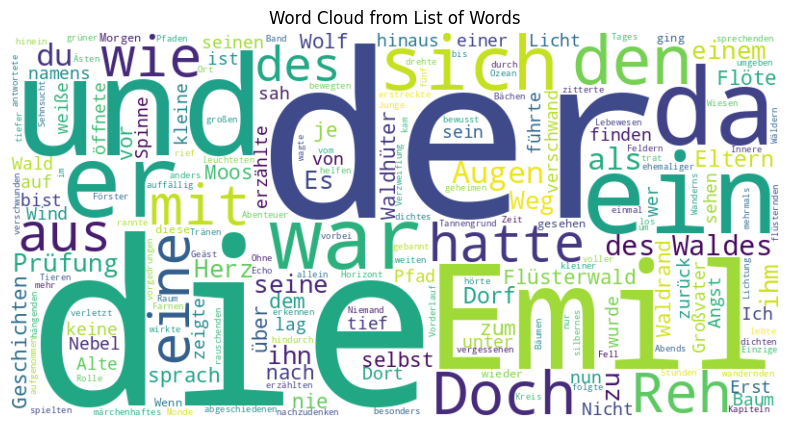

In [24]:
# Wir schaffen eine Wortwolke nur auf Grundlage der nicht-normalisierten Tokens
# Join the words into a single string
story = ' '.join(tokens)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(story)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from List of Words")
plt.show()

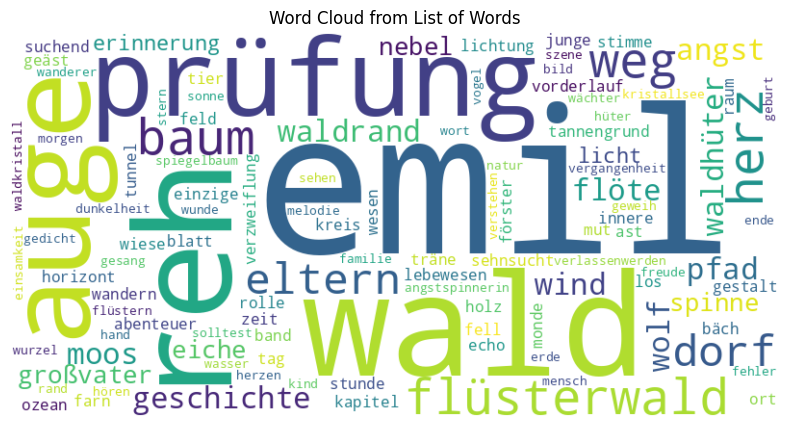

In [25]:
# Wir schaffen eine Wortwolke nur auf Grundlage der nicht-normalisierten Tokens
# Join the words into a single string
story = ' '.join(lemmas_lower_case_nouns_only)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(story)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from List of Words")
plt.show()

In [33]:
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-german-cased")

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/456 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/240k [00:00<?, ?B/s]

In [35]:
for token in tokenizer.tokenize(text):
  print(token)

Ich
will
gerne
mehr
über
NL
##P
erfahren
,
weil
es
ein
super
##spanne
##nde
##s
Feld
ist
.


In [36]:
for token in doc:
  print(token.text)

Ich
will
gerne
mehr
über
NLP
erfahren
,
weil
es
ein
superspannendes
Feld
ist
.


In [39]:
print([token for token in tokenizer.tokenize(text)])

['Ich', 'will', 'gerne', 'mehr', 'über', 'NL', '##P', 'erfahren', ',', 'weil', 'es', 'ein', 'super', '##spanne', '##nde', '##s', 'Feld', 'ist', '.']
